In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.tree as tree
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
from sklearn.tree import plot_tree
import pandas as pd 
import matplotlib
import dtreeviz

In [20]:
def loadData(fname):
    df = pd.read_csv(fname);
    features = df [['cmax', 'cmin', 'cavg', 'tRC50']]
    response = df[['response']]
    data = {'features': features, 'response':response}
    return data

def decisionTreePlot(data, fname, titletext):
    features  = data['features'].copy()
    response = data['response'].copy()
    features.iloc[:, 0:3] = np.log10(features.iloc[:, 0:3] + 1e-1)
    model = tree.DecisionTreeRegressor(max_depth = 2, random_state=0)
    model.fit(features, response)
    print(model.score(features, response))
#     matplotlib.rcParams.update({'font.size': 20})
#     f = plt.figure(figsize = (24, 12))
#     _ = plot_tree(model, feature_names=features.columns, max_depth = 3, filled = True, proportion = True, 
#                   node_ids = True)
#     plt.title(titletext)
#     f.savefig(fname, dpi =500)
    viz = dtreeviz.model(model,
        X_train=features.values,
        y_train=response.values,
        target_name='Response',
        feature_names=['log10(Cmax)', 'log10(Cmin)', 'log10(Cavg)', 'tRC50'])
    v = viz.view(fancy = False,
                 colors={'scatter_marker':'k','scatter_alpha':0.3},
                 scale = 1.5)
    v.save(fname)
    return v

def shapPlot(data, fname, titletext):
    features = data['features'].copy()
    response = data['response'].copy()
    features.iloc[:, 0:3] = np.log10(features.iloc[:, 0:3] + 1e-1)
    model = tree.DecisionTreeRegressor(max_depth = 7, random_state=0)
    model.fit(features, response)
    print(model.score(features, response))
    explainer = shap.Explainer(model)
    shap_values = explainer(features)
    matplotlib.rcParams.update({'font.size': 20})
    f ,ax = plt.subplots(1, 1)
    shap.plots.beeswarm(shap_values, plot_size = 1)
    ax.set_title(titletext)
    f.tight_layout()
    f.savefig(fname, dpi = 500)




# Load the data

In [5]:
dataIndirectFast = loadData('./csvFiles/featuresIndirectFast1.csv')
dataIndirectSlow = loadData('./csvFiles/featuresIndirectSlow1.csv')
dataPrecursor = loadData('./csvFiles/featuresPrecursor.csv')
dataTransduction = loadData('./csvFiles/featuresTransduction.csv')
dataTolerance = loadData('./csvFiles/featuresTolerance.csv')
dataTumor = loadData('./csvFiles/featuresTumor.csv')

#pd.concat([dataIndirectFast['response'], dataIndirectSlow['response']], axis = 1)

# Fit decision tree regression

In [21]:
v=decisionTreePlot(dataIndirectFast, './svgFiles/indirectFastTree.svg', 'Indirect response (fast turnover)')
v=decisionTreePlot(dataIndirectSlow, './svgFiles/indirectSlowTree.svg', 'Indirect response (slow turnover)')
v=decisionTreePlot(dataPrecursor, './svgFiles/precursorTree.svg', 'Precursor activation')
v=decisionTreePlot(dataTransduction, './svgFiles/transductionTree.svg', 'Transduction')
v=decisionTreePlot(dataTolerance, './svgFiles/toleranceTree.svg', 'Tolerance')
v=decisionTreePlot(dataTumor, './svgFiles/tumorTree.svg', 'Tumor')
v

0.9813009372232768
0.951214037602969
0.9323076996608259
0.9494287732797211
0.9493388169955005
0.941355009230967


0.9998897627403143


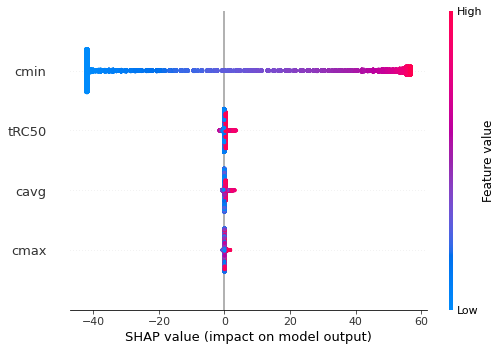

0.9988822999736032


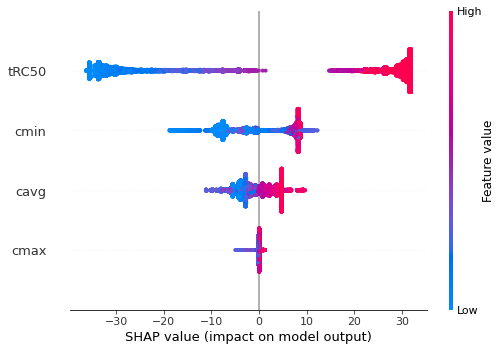

0.9982228795465502


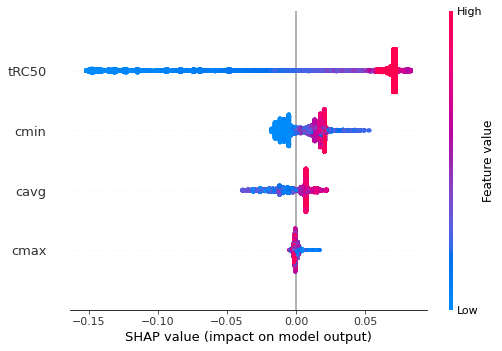

0.9990555502029849


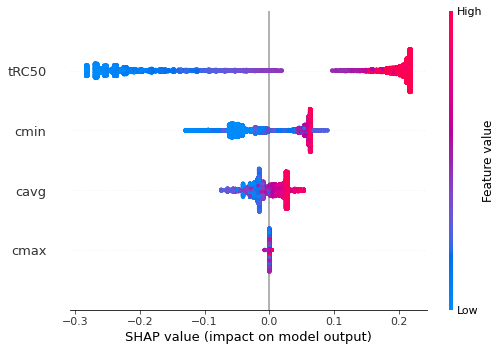

0.9989178262747924


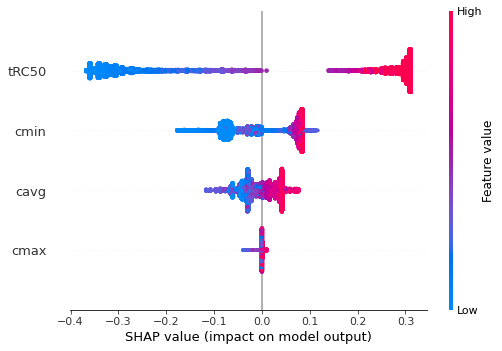

0.998716048799591


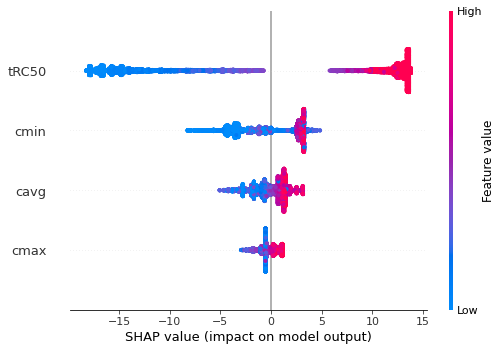

In [22]:
f=shapPlot(dataIndirectFast, './pngFiles/shapIndirectFast.png', 'Indirect response (fast turnover)')
f=shapPlot(dataIndirectSlow, './pngFiles/shapIndirectSlow.png', 'Indirect response (slow turnover)')
f=shapPlot(dataPrecursor, './pngFiles/shapPrecursor.png', 'Precursor activation')
f=shapPlot(dataTransduction, './pngFiles/shapTransduction.png', 'Transduction')
f=shapPlot(dataTolerance, './pngFiles/shapTolerance.png', 'Tolerance')
f=shapPlot(dataTumor, './pngFiles/shapTumor.png', 'Tumor')
